In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data to'ldirish

In [58]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Safety,yacEPA,Drive,FieldGoalDistance,airEPA,Field_Goal_Prob,posteam,Penalty.Yards,FieldGoalResult,...,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,RunGap,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,1.240299,18,NaN,-0.588101,0.309404,TB,0,NaN,...,0,3,3,NaN,1,1,2014,0.000527,0.024134,0
1,115340,0,NaN,22,NaN,NaN,0.198142,OAK,0,NaN,...,0,4,3,NaN,0,7,2011,0.001883,0.246929,0
2,68357,0,NaN,8,NaN,NaN,0.000000,NYJ,0,NaN,...,0,2,1,NaN,0,1,2010,0.000000,0.000000,0
3,368377,0,1.075660,24,NaN,0.402080,0.258227,CLE,0,NaN,...,0,4,0,NaN,1,9,2017,0.000845,0.133814,0
4,384684,0,NaN,11,NaN,NaN,0.199771,DEN,0,NaN,...,0,2,2,end,0,10,2017,0.003453,0.170787,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40769 entries, 0 to 40768
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   40769 non-null  int64  
 1   Safety                       40769 non-null  int64  
 2   yacEPA                       15867 non-null  float64
 3   Drive                        40769 non-null  int64  
 4   FieldGoalDistance            902 non-null    float64
 5   airEPA                       15875 non-null  float64
 6   Field_Goal_Prob              40748 non-null  float64
 7   posteam                      38219 non-null  object 
 8   Penalty.Yards                40769 non-null  int64  
 9   FieldGoalResult              908 non-null    object 
 10  DefTeamScore                 38019 non-null  float64
 11  Tackler2                     4943 non-null   object 
 12  Away_WP_pre                  38223 non-null  float64
 13  Timeout_Indicato

In [60]:
count_nulls = (df.isna().sum()/40769*100).to_dict()
data10, data80, dropCols = [], [], []
for x in count_nulls:
    if 0 < count_nulls[x] < 10:
        data10.append(x)
    elif 10 <= count_nulls[x] <= 80:
        data80.append(x)
    elif count_nulls[x] > 80:
        dropCols.append(x)

In [61]:
df = df.drop(columns=dropCols)
# 80% dan kop malumot yoqligi uchun bu columnlarni uchirdim

In [62]:
strings = []
for item in data80:
    if type(df[item].to_list()[0]) == str or df[item].isna()[0] == True:
        strings.append(item)
        continue
    print(item, end=' ')
    print(f'Min: {df[item].min()}', end=' ')
    print(f'Max: {df[item].max()}')

yacEPA Min: -14.0 Max: 8.390142641493673
airEPA Min: -5.930319076316459 Max: 6.3974951195695535


In [63]:
df['yacEPA'] = df['yacEPA'].fillna(999)
df['airEPA'] = df['airEPA'].fillna(999)
# bu ustunlarni max va min lari uncha katta bolmaganligi uchun nan orniga 999 qoyildi

In [64]:
for item in strings:
    print(df[item].value_counts(), end='\n\n\n\n\n')

Passer
D.Brees             577
E.Manning           541
M.Stafford          534
T.Brady             523
P.Rivers            514
                   ... 
T.Hill                1
B.Daniels             1
G.Harrell             1
EMPT. Alex Smith      1
J.Callahan            1
Name: count, Length: 187, dtype: int64




PassOutcome
Complete           10122
Incomplete Pass     6629
Name: count, dtype: int64




RunGap
end       3154
tackle    2915
guard     2692
Name: count, dtype: int64






In [65]:
strings

['Passer', 'PassOutcome', 'RunGap']

In [66]:
df[strings[2]].value_counts()

RunGap
end       3154
tackle    2915
guard     2692
Name: count, dtype: int64

In [67]:
df[strings[2]] = df[strings[2]].fillna('Missing')
# bu column da faqat 3 hil yozuv borakan shunin uchun mode olmasdan missing qoydim

In [68]:
df[strings[0]].value_counts()

Passer
D.Brees             577
E.Manning           541
M.Stafford          534
T.Brady             523
P.Rivers            514
                   ... 
T.Hill                1
B.Daniels             1
G.Harrell             1
EMPT. Alex Smith      1
J.Callahan            1
Name: count, Length: 187, dtype: int64

In [69]:
passerMode = df[strings[0]].mode()
df[strings[0]] = df[strings[0]].fillna(passerMode)
# bu column uchun nan toldirish uchun mode olindi

In [70]:
df[strings[1]].value_counts()

PassOutcome
Complete           10122
Incomplete Pass     6629
Name: count, dtype: int64

In [71]:
df[strings[1]] = df[strings[1]].fillna('Missing')


In [72]:
df[data10]

,Field_Goal_Prob,posteam,DefTeamScore,Away_WP_pre,TimeSecs,PlayTimeDiff,Opp_Safety_Prob,No_Score_Prob
0,0.309404,TB,10.0,0.774353,939.0,12.0,0.000527,0.024134
1,0.198142,OAK,14.0,0.943964,407.0,44.0,0.001883,0.246929
2,0.000000,NYJ,13.0,0.634693,1823.0,0.0,0.000000,0.000000
3,0.258227,CLE,31.0,0.064005,528.0,8.0,0.000845,0.133814
4,0.199771,DEN,24.0,0.071526,2355.0,0.0,0.003453,0.170787
...,...,...,...,...,...,...,...,...
40764,0.381506,NO,0.0,0.163670,2868.0,31.0,0.000021,0.005075
40765,0.244675,DEN,0.0,0.139549,1962.0,20.0,0.000134,0.287528
40766,0.147057,ATL,10.0,0.467202,1856.0,27.0,0.001132,0.612357
40767,0.373774,IND,13.0,0.773475,1289.0,7.0,0.000042,0.002641


In [73]:
data10Str = []
for item in data10:
    if type(df[item].to_list()[0]) == str or df[item].isna()[0] == True:
        data10Str.append(item)
        continue
    print(item, end=' ')
    print(f'Min: {df[item].min()}', end=' ')
    print(f'Max: {df[item].max()}', end=' ')
    print(f'Med: {df[item].median()}')


Field_Goal_Prob Min: 0.0 Max: 0.9945918969349068 Med: 0.2306319714387671
DefTeamScore Min: 0.0 Max: 61.0 Med: 10.0
Away_WP_pre Min: 0.0 Max: 1.0 Med: 0.471362239854573
TimeSecs Min: -900.0 Max: 3600.0 Med: 1800.0
PlayTimeDiff Min: 0.0 Max: 927.0 Med: 18.0
Opp_Safety_Prob Min: 0.0 Max: 0.0289499430224639 Med: 0.0009774148652909
No_Score_Prob Min: 0.0 Max: 1.0 Med: 0.024740681704098648


In [74]:
for item in data10:
    if item in data10Str:
        continue
    else:
        df[item] = df[item].fillna(df[item].median())
    
# 0% dan 10% foizgacha bo'lgan nan larni median bilan toldirildi

In [75]:
data10Str

['posteam']

In [76]:
df[data10Str].value_counts()

posteam
DEN        1284
PHI        1244
DET        1243
NO         1233
BAL        1218
IND        1218
NE         1216
SEA        1211
KC         1210
HOU        1209
ARI        1208
SF         1207
WAS        1201
GB         1198
DAL        1192
CIN        1189
CHI        1188
BUF        1186
NYJ        1183
MIN        1182
NYG        1181
OAK        1180
ATL        1167
MIA        1160
TB         1149
PIT        1147
TEN        1138
CAR        1128
CLE        1117
SD         1086
STL         968
JAC         936
JAX         272
LA          255
LAC         115
Name: count, dtype: int64

In [77]:
df[data10Str] = df[data10Str].fillna('Missing')
# bu column davlatlarni nomi ekanligi uchun missing qoyildi

In [78]:
df

,Unnamed: 0,Safety,yacEPA,Drive,airEPA,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,...,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,RunGap,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,1.240299,18,-0.588101,0.309404,TB,0,10.0,0.774353,...,0,3,3,Missing,1,1,2014,0.000527,0.024134,0
1,115340,0,999.000000,22,999.000000,0.198142,OAK,0,14.0,0.943964,...,0,4,3,Missing,0,7,2011,0.001883,0.246929,0
2,68357,0,999.000000,8,999.000000,0.000000,NYJ,0,13.0,0.634693,...,0,2,1,Missing,0,1,2010,0.000000,0.000000,0
3,368377,0,1.075660,24,0.402080,0.258227,CLE,0,31.0,0.064005,...,0,4,0,Missing,1,9,2017,0.000845,0.133814,0
4,384684,0,999.000000,11,999.000000,0.199771,DEN,0,24.0,0.071526,...,0,2,2,end,0,10,2017,0.003453,0.170787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40764,79438,0,999.000000,3,999.000000,0.381506,NO,0,0.0,0.163670,...,0,1,3,guard,0,3,2010,0.000021,0.005075,0
40765,398233,0,999.000000,9,999.000000,0.244675,DEN,0,0.0,0.139549,...,0,2,3,guard,0,3,2017,0.000134,0.287528,0
40766,396466,0,999.000000,8,999.000000,0.147057,ATL,0,10.0,0.467202,...,0,2,1,guard,0,1,2017,0.001132,0.612357,0
40767,333861,0,0.025040,14,0.280049,0.373774,IND,0,13.0,0.773475,...,0,3,3,Missing,1,7,2016,0.000042,0.002641,0


# hw 13

In [79]:
df

,Unnamed: 0,Safety,yacEPA,Drive,airEPA,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,...,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,RunGap,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,1.240299,18,-0.588101,0.309404,TB,0,10.0,0.774353,...,0,3,3,Missing,1,1,2014,0.000527,0.024134,0
1,115340,0,999.000000,22,999.000000,0.198142,OAK,0,14.0,0.943964,...,0,4,3,Missing,0,7,2011,0.001883,0.246929,0
2,68357,0,999.000000,8,999.000000,0.000000,NYJ,0,13.0,0.634693,...,0,2,1,Missing,0,1,2010,0.000000,0.000000,0
3,368377,0,1.075660,24,0.402080,0.258227,CLE,0,31.0,0.064005,...,0,4,0,Missing,1,9,2017,0.000845,0.133814,0
4,384684,0,999.000000,11,999.000000,0.199771,DEN,0,24.0,0.071526,...,0,2,2,end,0,10,2017,0.003453,0.170787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40764,79438,0,999.000000,3,999.000000,0.381506,NO,0,0.0,0.163670,...,0,1,3,guard,0,3,2010,0.000021,0.005075,0
40765,398233,0,999.000000,9,999.000000,0.244675,DEN,0,0.0,0.139549,...,0,2,3,guard,0,3,2017,0.000134,0.287528,0
40766,396466,0,999.000000,8,999.000000,0.147057,ATL,0,10.0,0.467202,...,0,2,1,guard,0,1,2017,0.001132,0.612357,0
40767,333861,0,0.025040,14,0.280049,0.373774,IND,0,13.0,0.773475,...,0,3,3,Missing,1,7,2016,0.000042,0.002641,0


In [80]:
data10

['Field_Goal_Prob',
 'posteam',
 'DefTeamScore',
 'Away_WP_pre',
 'TimeSecs',
 'PlayTimeDiff',
 'Opp_Safety_Prob',
 'No_Score_Prob']

In [81]:
df[data10]

,Field_Goal_Prob,posteam,DefTeamScore,Away_WP_pre,TimeSecs,PlayTimeDiff,Opp_Safety_Prob,No_Score_Prob
0,0.309404,TB,10.0,0.774353,939.0,12.0,0.000527,0.024134
1,0.198142,OAK,14.0,0.943964,407.0,44.0,0.001883,0.246929
2,0.000000,NYJ,13.0,0.634693,1823.0,0.0,0.000000,0.000000
3,0.258227,CLE,31.0,0.064005,528.0,8.0,0.000845,0.133814
4,0.199771,DEN,24.0,0.071526,2355.0,0.0,0.003453,0.170787
...,...,...,...,...,...,...,...,...
40764,0.381506,NO,0.0,0.163670,2868.0,31.0,0.000021,0.005075
40765,0.244675,DEN,0.0,0.139549,1962.0,20.0,0.000134,0.287528
40766,0.147057,ATL,10.0,0.467202,1856.0,27.0,0.001132,0.612357
40767,0.373774,IND,13.0,0.773475,1289.0,7.0,0.000042,0.002641


In [118]:
myc = ['DefTeamScore', 'TimeSecs', 'PlayTimeDiff']
myDf = df[myc].head(2000)

In [119]:
myDf

,DefTeamScore,TimeSecs,PlayTimeDiff
0,10.0,939.0,12.0
1,14.0,407.0,44.0
2,13.0,1823.0,0.0
3,31.0,528.0,8.0
4,24.0,2355.0,0.0
...,...,...,...
1995,7.0,1703.0,44.0
1996,3.0,2368.0,25.0
1997,0.0,2568.0,42.0
1998,13.0,351.0,12.0


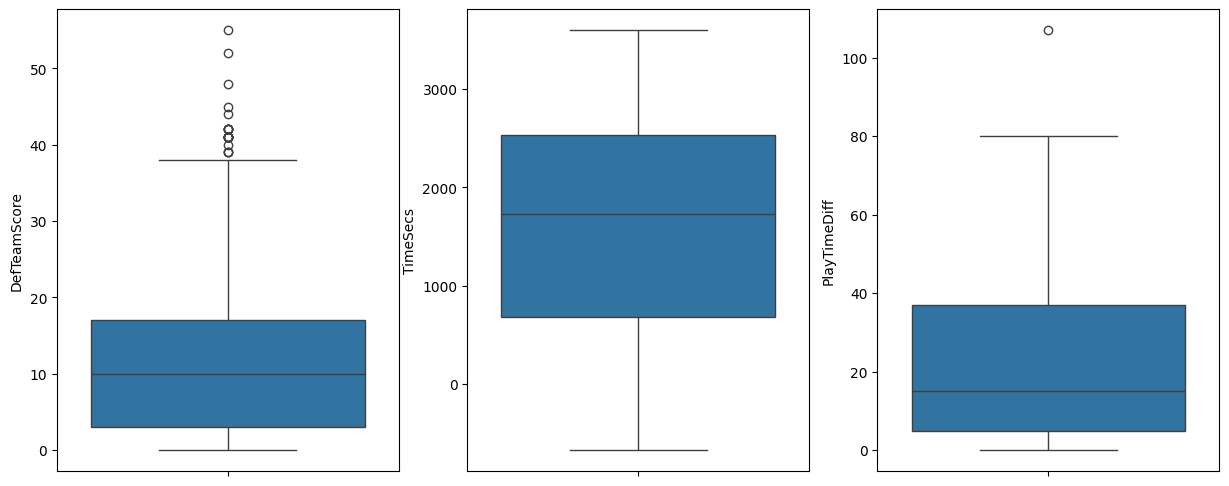

In [120]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.boxplot(myDf[myc[0]], ax=ax0)
sns.boxplot(myDf[myc[1]], ax=ax1)
sns.boxplot(myDf[myc[2]], ax=ax2)
plt.show()

## standard normalisation

In [124]:
a, b, c = myc
std_norm = (myDf - myDf.mean())/myDf.std()
std_norm

,DefTeamScore,TimeSecs,PlayTimeDiff
0,-0.152361,-0.659986,-0.484110
1,0.263359,-1.157362,1.422421
2,0.159429,0.166481,-1.199059
3,2.030169,-1.044237,-0.722426
4,1.302659,0.663857,-1.199059
...,...,...,...
1995,-0.464152,0.054291,1.422421
1996,-0.879872,0.676011,0.290418
1997,-1.191662,0.862995,1.303263
1998,0.159429,-1.209717,-0.484110


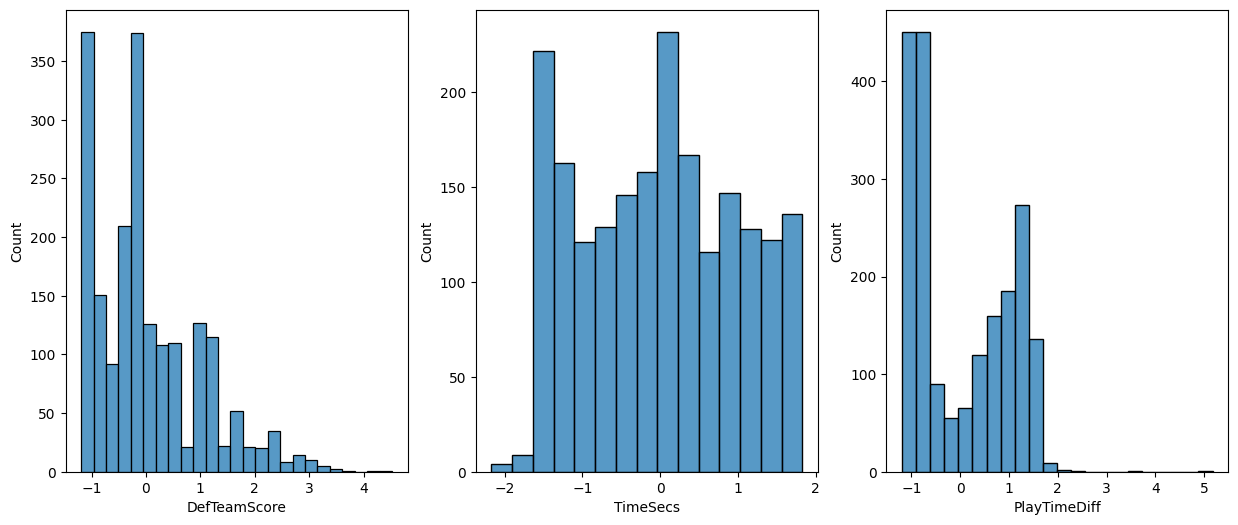

In [125]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(std_norm[a], ax=ax0)
sns.histplot(std_norm[b], ax=ax1)
sns.histplot(std_norm[c], ax=ax2)
plt.show()

## min max normalisation

In [127]:
min_max = (myDf - myDf.min()) / (myDf.max() - myDf.min())
min_max

,DefTeamScore,TimeSecs,PlayTimeDiff
0,0.181818,0.377544,0.112150
1,0.254545,0.253099,0.411215
2,0.236364,0.584327,0.000000
3,0.563636,0.281404,0.074766
4,0.436364,0.708772,0.000000
...,...,...,...
1995,0.127273,0.556257,0.411215
1996,0.054545,0.711813,0.233645
1997,0.000000,0.758596,0.392523
1998,0.236364,0.240000,0.112150


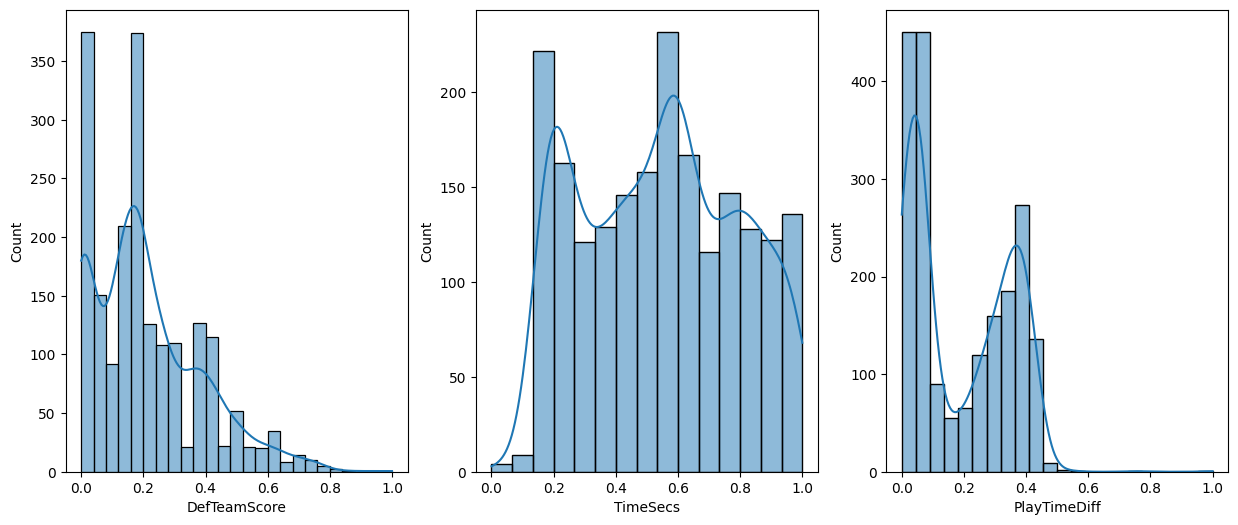

In [129]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(min_max[a], ax=ax0, kde=True)
sns.histplot(min_max[b], ax=ax1, kde=True)
sns.histplot(min_max[c], ax=ax2, kde=True)
plt.show()

## max abs scaling

In [130]:
max_abs = myDf / abs(myDf).max()

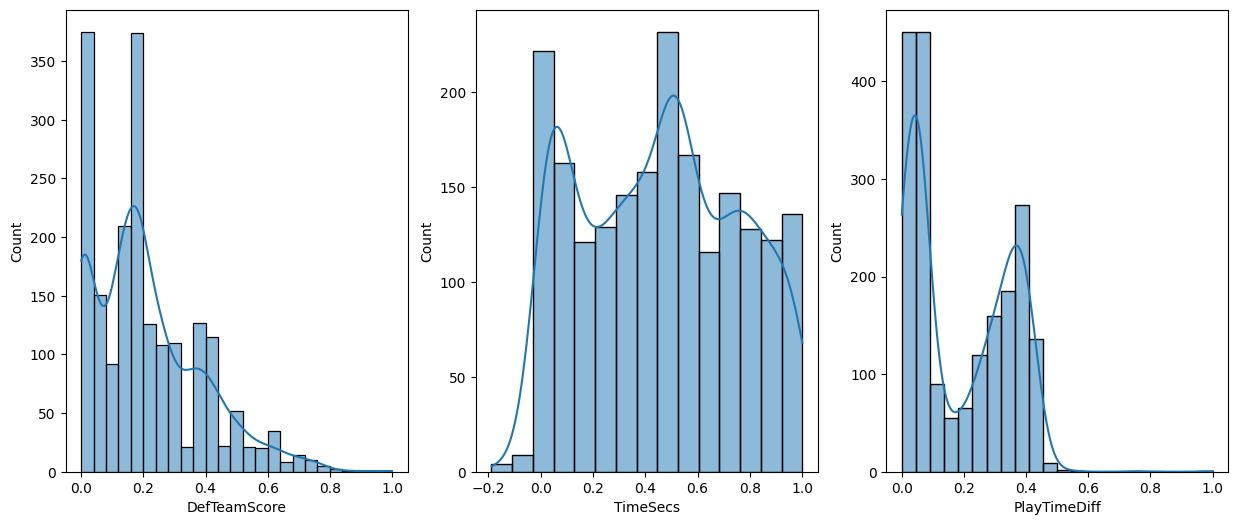

In [131]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(max_abs[a], ax=ax0, kde=True)
sns.histplot(max_abs[b], ax=ax1, kde=True)
sns.histplot(max_abs[c], ax=ax2, kde=True)
plt.show()

In [133]:
iqr = myDf.quantile(0.75) - myDf.quantile(0.25)
iqr_norm = (myDf - myDf.median()) / iqr

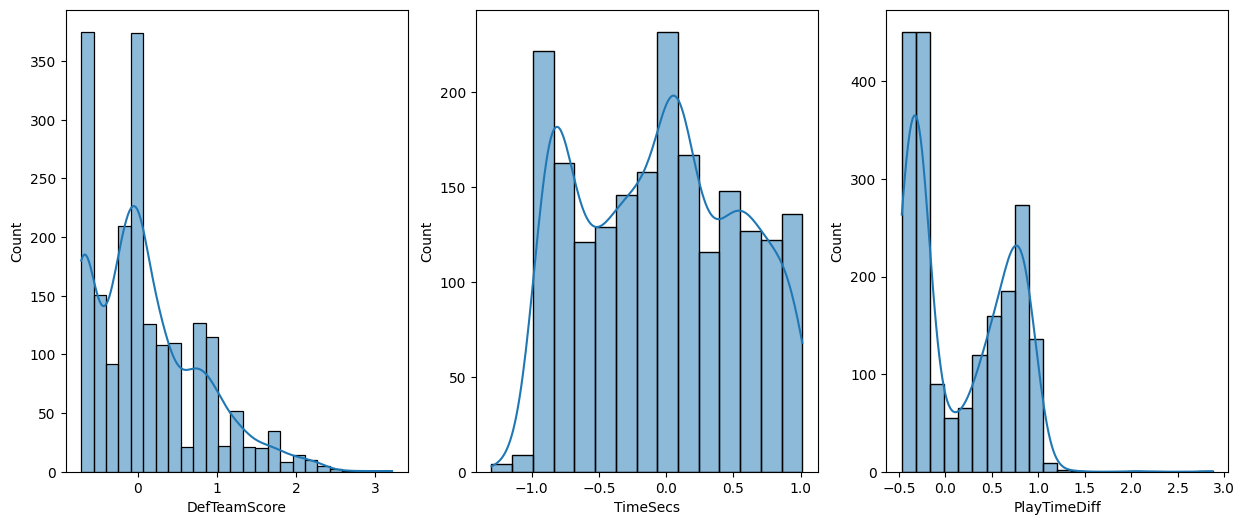

In [134]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.histplot(iqr_norm[a], ax=ax0, kde=True)
sns.histplot(iqr_norm[b], ax=ax1, kde=True)
sns.histplot(iqr_norm[c], ax=ax2, kde=True)
plt.show()